<a href="https://colab.research.google.com/github/sriharimohan/Premier-League-Match-Prediction-using-ML-Models/blob/main/Project_Main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
df=pd.read_csv('/content/England.csv')

In [13]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12153 entries, 0 to 12152
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   HomeTeam        12153 non-null  object 
 1   AwayTeam        12153 non-null  object 
 2   FTH Goals       12153 non-null  int64  
 3   FTA Goals       12153 non-null  int64  
 4   FT Result       12153 non-null  object 
 5   HTH Goals       11229 non-null  float64
 6   HTA Goals       11229 non-null  float64
 7   HT Result       11229 non-null  object 
 8   Referee         9329 non-null   object 
 9   H Shots         9329 non-null   float64
 10  A Shots         9329 non-null   float64
 11  H SOT           9329 non-null   float64
 12  A SOT           9329 non-null   float64
 13  H Fouls         9329 non-null   float64
 14  A Fouls         9329 non-null   float64
 15  H Corners       9329 non-null   float64
 16  A Corners       9329 non-null   float64
 17  H Yellow        9329 non-null  

,HomeTeam,AwayTeam,FTH Goals,FTA Goals,FT Result,HTH Goals,HTA Goals,HT Result,Referee,H Shots,...,A Corners,H Yellow,A Yellow,H Red,A Red,Display_Order,League,GoalDiff,ShotDifference,Result
0,Ipswich Town,Brighton & Hove Albion,0,2,A,0.0,1.0,A,T Harrington,5.0,...,9.0,2.0,2.0,0.0,0.0,20250116,Premier League,-2,-2.0,-1
1,Man United,Southampton,3,1,H,0.0,1.0,A,J Brooks,23.0,...,4.0,1.0,3.0,0.0,0.0,20250116,Premier League,2,4.0,1
2,Everton,Aston Villa,0,1,A,0.0,0.0,D,S Barrott,10.0,...,5.0,2.0,1.0,0.0,0.0,20250115,Premier League,-1,0.0,-1
3,Leicester,Crystal Palace,0,2,A,0.0,0.0,D,A Madley,21.0,...,3.0,0.0,0.0,0.0,0.0,20250115,Premier League,-2,0.0,-1
4,Newcastle,Wolves,3,0,H,1.0,0.0,H,D England,17.0,...,2.0,0.0,2.0,0.0,0.0,20250115,Premier League,3,-2.0,1


In [14]:
required_columns = [
    'FT Result', 'H Shots', 'A Shots', 'H SOT', 'A SOT',
    'H Fouls', 'A Fouls', 'H Corners', 'A Corners',
    'H Yellow', 'A Yellow', 'H Red', 'A Red'
]

In [15]:
df_cleaned = df.dropna(subset=required_columns)

In [62]:
df_cleaned['Result'] = df_cleaned['FT Result'].map({'A': 0, 'D': 1, 'H': 2})

/tmp/ipython-input-2809954652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Result'] = df_cleaned['FT Result'].map({'A': 0, 'D': 1, 'H': 2})


In [63]:
df_cleaned['ShotsOnTargetDiff'] = df_cleaned['H SOT'] - df_cleaned['A SOT']
df_cleaned['ShotsDiff'] = df_cleaned['H Shots'] - df_cleaned['A Shots']
df_cleaned['FoulsDiff'] = df_cleaned['H Fouls'] - df_cleaned['A Fouls']
df_cleaned['CornersDiff'] = df_cleaned['H Corners'] - df_cleaned['A Corners']
df_cleaned['YellowDiff'] = df_cleaned['H Yellow'] - df_cleaned['A Yellow']
df_cleaned['RedDiff'] = df_cleaned['H Red'] - df_cleaned['A Red']

/tmp/ipython-input-338717184.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ShotsOnTargetDiff'] = df_cleaned['H SOT'] - df_cleaned['A SOT']
/tmp/ipython-input-338717184.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['ShotsDiff'] = df_cleaned['H Shots'] - df_cleaned['A Shots']
/tmp/ipython-input-338717184.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in

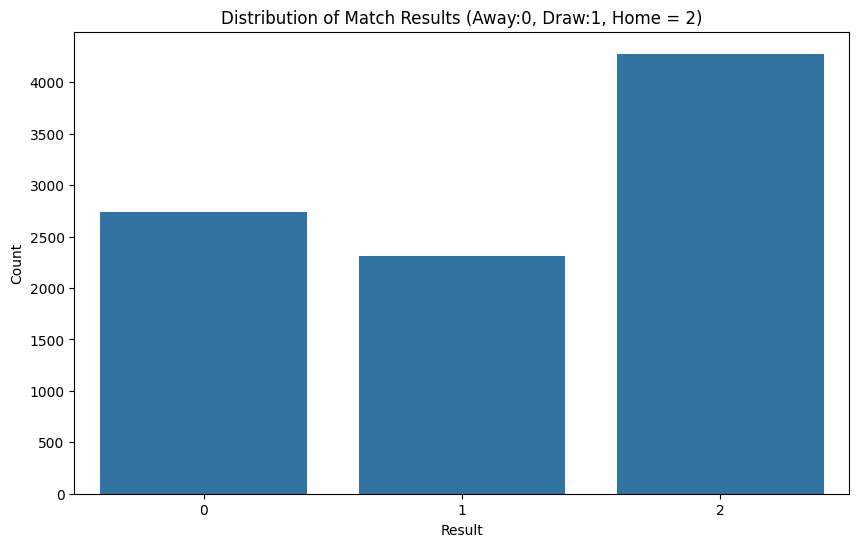

In [64]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(x='Result', data=df_cleaned, order=[0, 1, 2])
plt.title('Distribution of Match Results (Away:0, Draw:1, Home = 2)')
plt.xlabel('Result')
plt.ylabel('Count')
plt.show()

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

features = ['ShotsOnTargetDiff', 'ShotsDiff', 'FoulsDiff', 'CornersDiff', 'YellowDiff', 'RedDiff']
X = df_cleaned[features]
y = df_cleaned['Result']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

Scaler = StandardScaler()
X_train_scaled = Scaler.fit_transform(X_train)
X_test_scaled = Scaler.transform(X_test)
print(f"Step 4 Complete: Split into {len(X_train)} training matches and {len(X_test)} test matches.")

Step 4 Complete: Split into 7463 training matches and 1866 test matches.


In [66]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier

print("\nComparing Baseline Models")

# Define the 3 models in a dictionary
models_to_test = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Loop through and test each one
for name, model in models_to_test.items():
    # Logistic Regression works best with Scaled data. Trees work well with either.
    # We will use scaled data for all to be safe and consistent.
    model.fit(X_train_scaled, y_train)

    # Predict
    y_pred = model.predict(X_test_scaled)

    # Calculate score
    acc = accuracy_score(y_test, y_pred)
    print(f"Model: {name} | Accuracy: {acc:.4f}")

print("\n(Note: We usually pick the best one among the models)")


Comparing Baseline Models
Model: Logistic Regression | Accuracy: 0.5697
Model: Random Forest | Accuracy: 0.5220


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:199: UserWarning: [02:21:22] WARNING: /workspace/src/learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Model: XGBoost | Accuracy: 0.5573

(Note: We usually pick the best one among the models)


In [67]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear']
}

# Set up the Search
grid_search = GridSearchCV(LogisticRegression(max_iter=2000, random_state=42),
                           param_grid, cv=5, n_jobs=-1, verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print(f"Complete. Best settings found: {grid_search.best_params_}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Complete. Best settings found: {'C': 1, 'solver': 'liblinear'}


In [68]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"\nResults. Final Accuracy: {accuracy:.4f} (or {accuracy*100:.2f}%)")

print(classification_report(y_test, y_pred, target_names=['Away Win', 'Draw', 'Home Win']))


Results. Final Accuracy: 0.5707 (or 57.07%)
              precision    recall  f1-score   support

    Away Win       0.54      0.59      0.57       548
        Draw       0.00      0.00      0.00       462
    Home Win       0.58      0.86      0.70       856

    accuracy                           0.57      1866
   macro avg       0.38      0.49      0.42      1866
weighted avg       0.43      0.57      0.49      1866



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


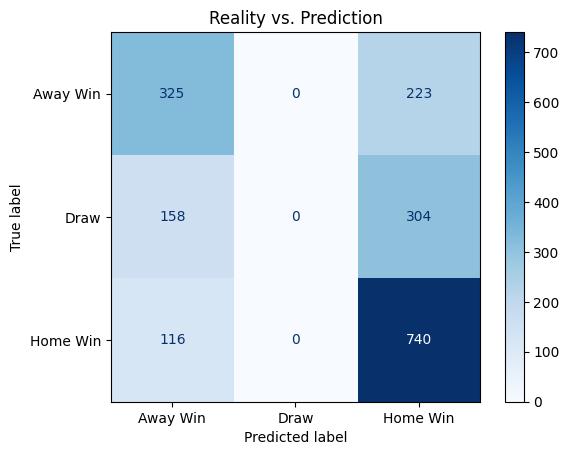

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Create the comparison matrix
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Plot it so it looks nice
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Away Win', 'Draw', 'Home Win'])
disp.plot(cmap='Blues')
plt.title("Reality vs. Prediction")
plt.show()


--- Step 7: Feature Importance ---
             Feature  Importance
0  ShotsOnTargetDiff    0.281691
2          FoulsDiff    0.002453
1          ShotsDiff   -0.017667
3        CornersDiff   -0.082675
4         YellowDiff   -0.089970
5            RedDiff   -0.597486


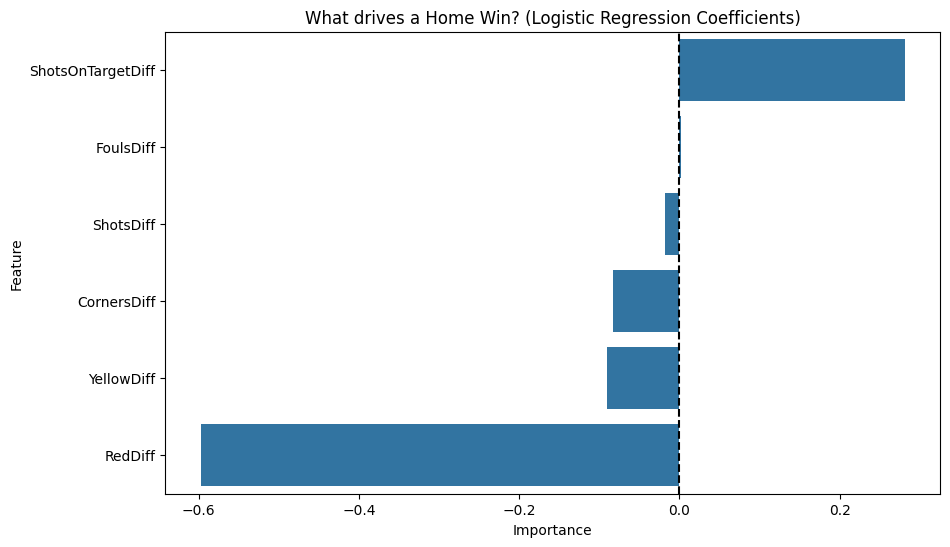

In [71]:
import seaborn as sns

print("\n--- Step 7: Feature Importance ---")

# Get the importance (Coefficients) for 'Home Win' (Class 2)
# Positive number = Helps Home Win. Negative number = Hurts Home Win.
importance = best_model.coef_[2]

# Create a table
feature_importance = pd.DataFrame({
    'Feature': features,
    'Importance': importance
})

# Sort by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)
print(feature_importance)

# Plot it
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title("What drives a Home Win? (Logistic Regression Coefficients)")
plt.axvline(x=0, color='black', linestyle='--') # Add a line at 0
plt.show()